# Customer Segmentation Classification

# Abstract: 
### This project focuses on the development and implementation of a Customer Segmentation Classification                   model for an automobile company planning market expansion. The objective is to predict customer segments         (A, B, C, D) in new markets based on existing market behaviors. The challenges involve handling missing                 data, exploring complex customer behaviors, and optimizing model performance.

# Objective: 
### The primary objective is to predict the right customer segments (A, B, C, D) for the automobile company's                products in new markets. This involves leveraging machine learning techniques to classify potential                          based on their characteristics and behaviors.

# Challenges:
### Missing Data: Addressing and imputing missing values in key features like 'Ever_Married,' 'Graduated,'                     'Var_1,' 'Work_Experience,' and 'Family_Size.'
### Behavioral Complexity: Analyzing and understanding intricate customer behaviors, such as age, work                       experience, family size, spending score, and categorical features like profession and de-identified                             categories.
### Model Optimization: Optimizing the performance of the classification model, with a particular focus on                       achieving accurate predictions for all customer segments.

# Dataset & Data Fields:
### The dataset includes information on customers in the existing market, with fields such as age, gender, marital           status, education, profession, work experience, family size, spending score, and de-identified categories                  (Var_1). The objective is to utilize this dataset to train a model for predicting customer segments in new                     markets.

# Libraries Used:
### pandas: Data manipulation and analysis.
### numpy: Mathematical operations.
### seaborn: Data visualization.
### matplotlib.pyplot: Plotting graphs.
### pd.set_option("display.max_columns", 50):Display all columns

# Importing the needed libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", 50) 

# Data Loading and Preprocessing
## Data Loading
### Loaded the dataset using pd.read_csv("Train.csv").
### Displayed the first few rows of the dataset using          df.head().


In [2]:
df=pd.read_csv("Train.csv")

In [3]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [4]:
df.shape

(8068, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [6]:
df.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [7]:
df['Ever_Married'].value_counts()

Yes    4643
No     3285
Name: Ever_Married, dtype: int64

In [8]:
df['Graduated'].value_counts() 

Yes    4968
No     3022
Name: Graduated, dtype: int64

In [9]:
+df['Profession'].value_counts() 

Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: Profession, dtype: int64

In [10]:
df['Work_Experience'].value_counts() 

1.0     2354
0.0     2318
9.0      474
8.0      463
2.0      286
3.0      255
4.0      253
6.0      204
7.0      196
5.0      194
10.0      53
11.0      50
12.0      48
13.0      46
14.0      45
Name: Work_Experience, dtype: int64

In [11]:
df['Family_Size'].value_counts() 

2.0    2390
3.0    1497
1.0    1453
4.0    1379
5.0     612
6.0     212
7.0      96
8.0      50
9.0      44
Name: Family_Size, dtype: int64

In [12]:
df['Var_1'].value_counts()

Cat_6    5238
Cat_4    1089
Cat_3     822
Cat_2     422
Cat_7     203
Cat_1     133
Cat_5      85
Name: Var_1, dtype: int64

In [13]:
def impute_missing_values(df):

    df['Ever_Married'].fillna(df['Ever_Married'].mode()[0], inplace=True)
    df['Graduated'].fillna(df['Graduated'].mode()[0], inplace=True)
    df['Var_1'].fillna(df['Var_1'].mode()[0], inplace=True)

    df['Work_Experience'].fillna(df['Work_Experience'].mean(), inplace=True)
    df['Family_Size'].fillna(df['Family_Size'].mean(), inplace=True)

    df['Profession'].fillna('else', inplace=True)

    return df
df = impute_missing_values(df)

# Handling Missing Values
### Imputed missing values in columns like 'Ever_Married', 'Graduated', 'Var_1', 'Work_Experience', 'Family_Size',          and 'Profession'.
### Used mode for categorical columns and mean for numerical columns to fill missing values.


In [14]:
df.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [15]:
df.duplicated().sum()

0

In [16]:
columns_to_drop1 = ['ID']
df = df.drop(columns=columns_to_drop1)

### -The ID column represents de-identified category for customers. 
### -It is irrelevance to my specific task. 

In [17]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.000000,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,2.641663,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.000000,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.000000,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,2.641663,High,6.0,Cat_6,A


In [18]:
df.describe()

,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,8068.000000
mean,43.466906,2.641663,2.850123
std,16.711696,3.226972,1.499278
min,18.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000
50%,40.000000,1.000000,2.850123
75%,53.000000,4.000000,4.000000
max,89.000000,14.000000,9.000000


##   Here we can observe the following:
#### Customer Age ranges from 18 to 89 with mean of 43.46
#### Work Experience range from 0 to 14 Years with mean of 2.64
#### Family Size range from 1 to 9 with mean of 2.8

# Exploratory Data Analysis (EDA)
### Explored data through visualizations using violin plots and count plots.
### Analyzed distributions and relationships between features.


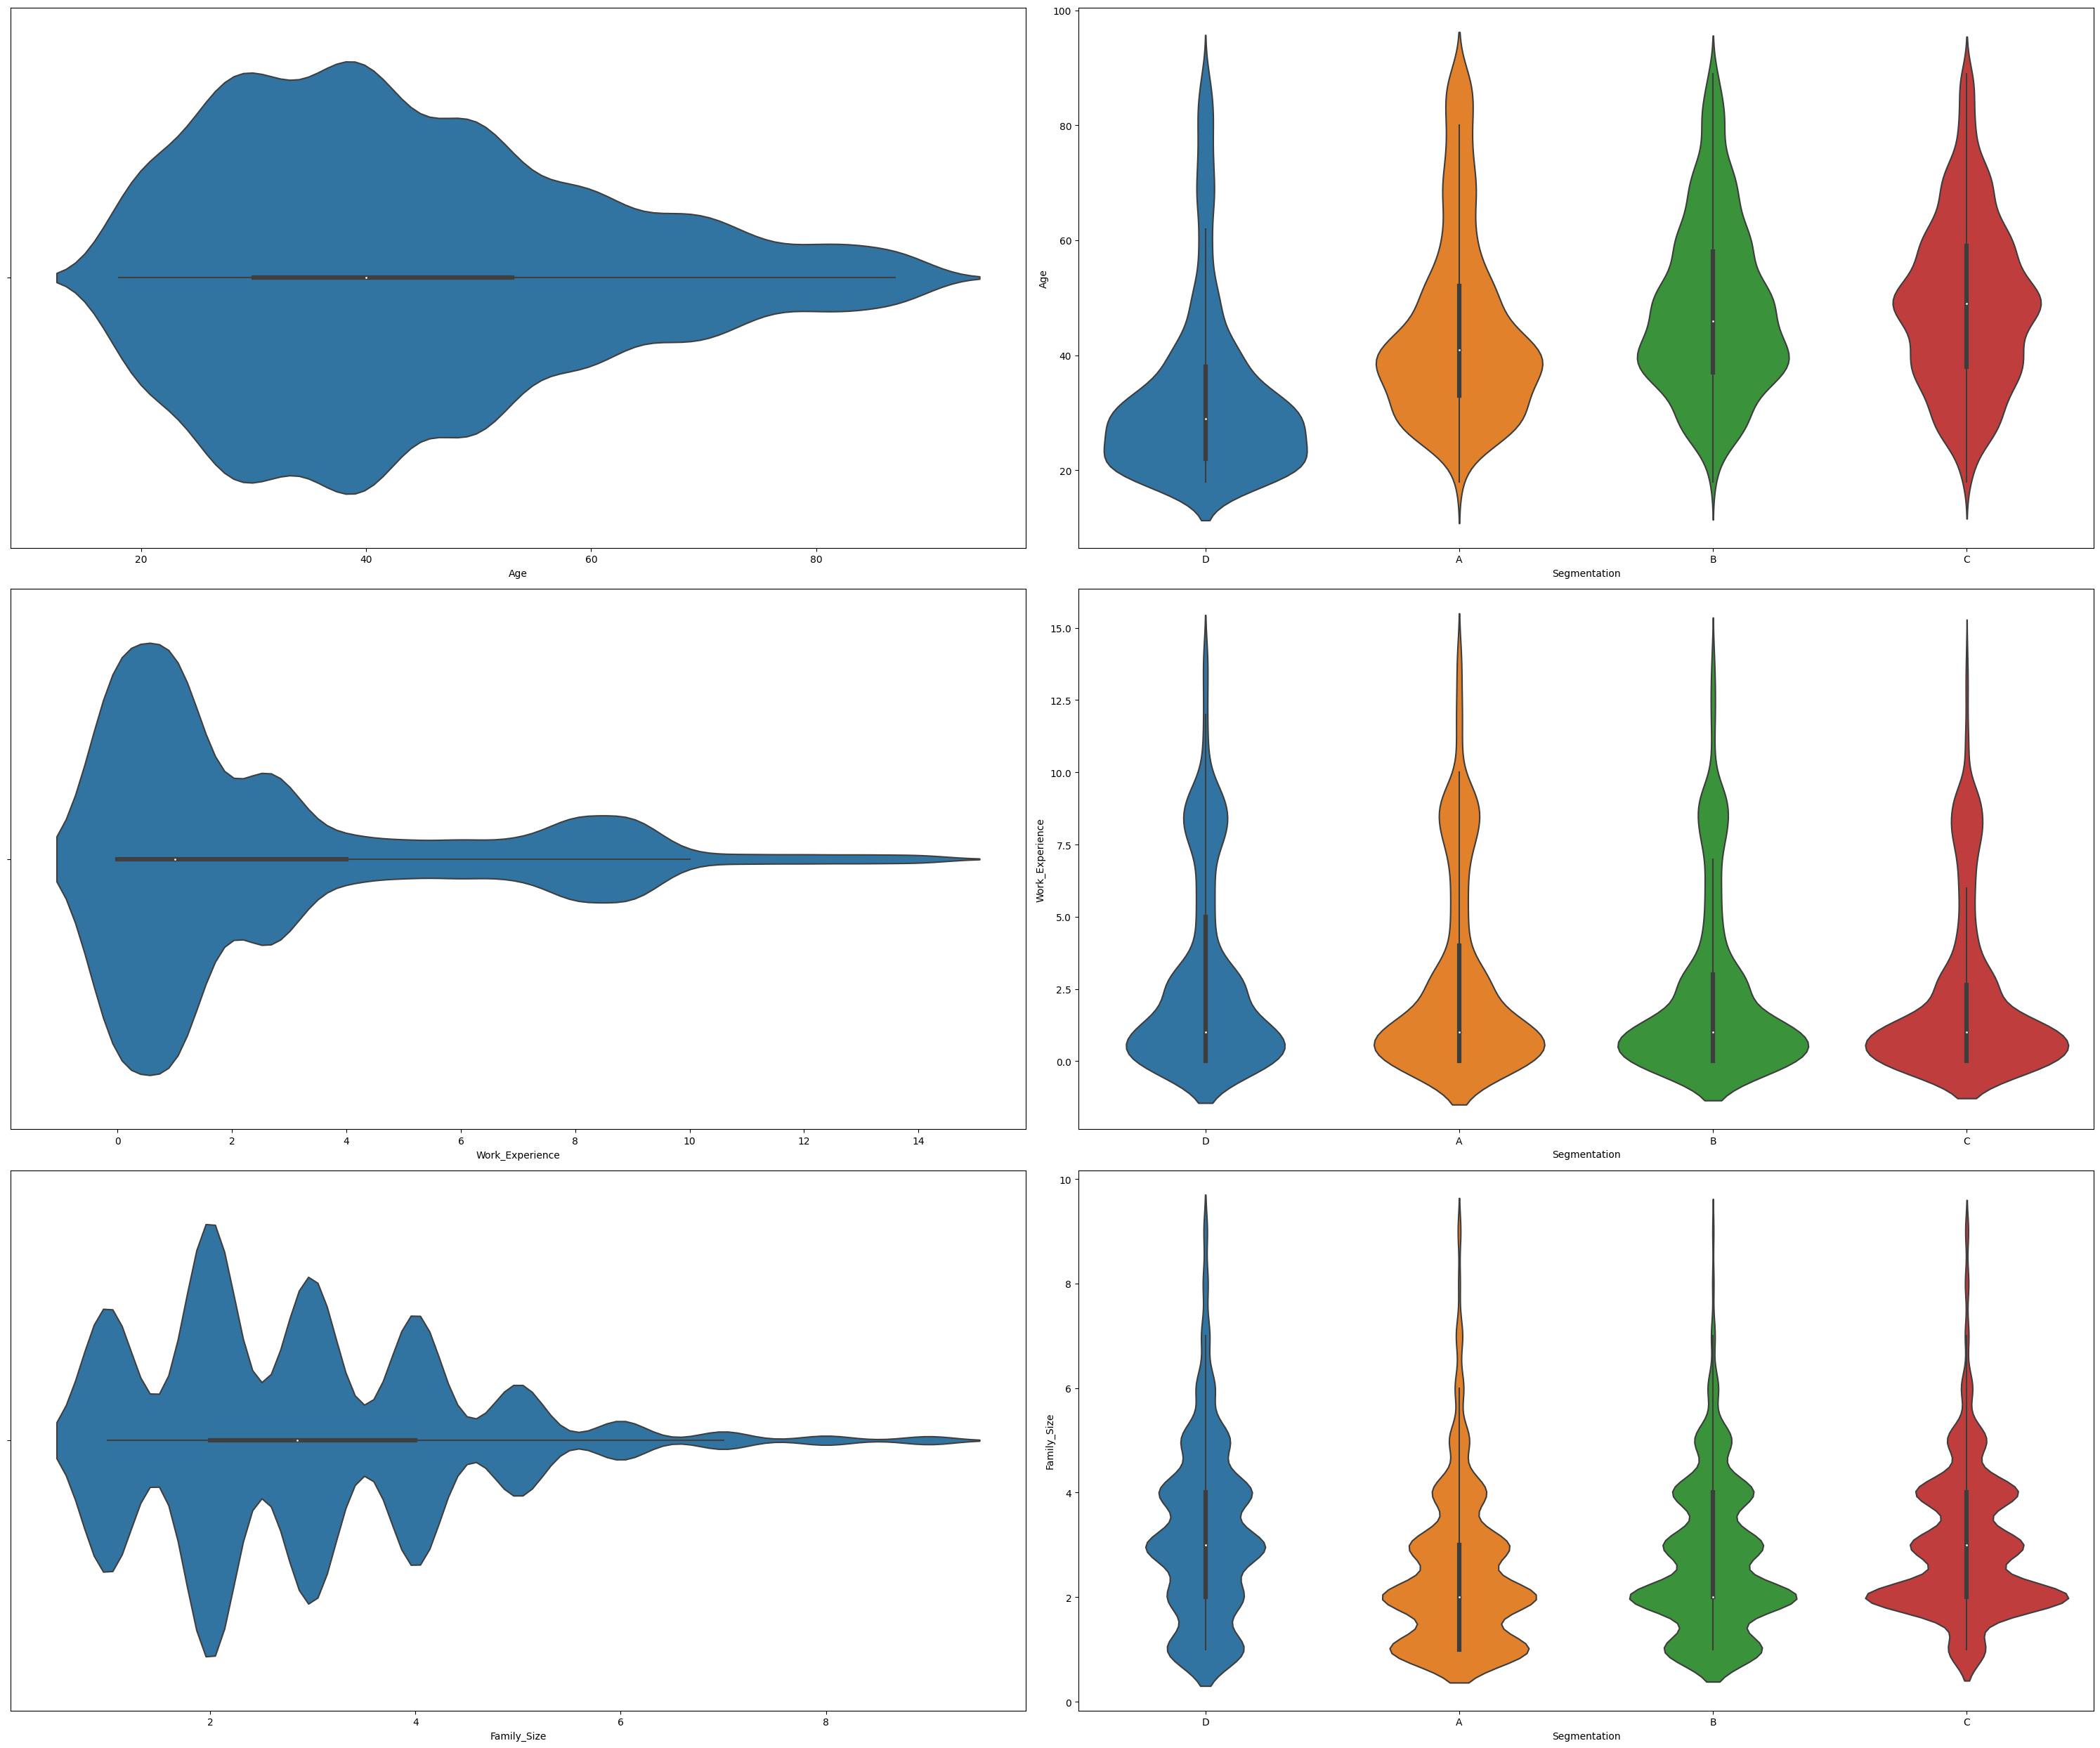

In [19]:
columns = ['Age', 'Work_Experience', 'Family_Size']

fig, axs = plt.subplots(len(columns), 2, figsize=(30, 25))

for i, col in enumerate(columns):
    sns.violinplot(x=df[col], ax=axs[i, 0])
    sns.violinplot(x='Segmentation', y=df[col], data=df, ax=axs[i, 1])

plt.tight_layout()
plt.show()

# Following observations can be derived from the above plots:
## Age:-
### Age looks closer to a normal distribution, with median close to 40
### If we look at distribution of age over segmentation:
### 'D' Has younger customers with median age between 20-40
### 'A' and 'B' customers with median age 40
### 'C' has median close to 50
## Work experience:- 
### Maximum population has Work experience less than 2 years
### Experience is identical over all segments as the median does not shift
## Family size:-
### Maximum population has family size less than 5, with a spike at 2
### If we look closely at distribution of family sizer over segments:
### 'D' follows a uniform distribution till 4, with median size close to 3
### 'B' and 'A' has median close to 2, range of A is lowest compared to others
### 'C' has median close to 2 , with a spike at 2


# Data Visualization
### Plotted violin plots to visualize the distribution of numerical features and their correlation with segmentation.
### Utilized count plots to visualize the distribution of categorical features and their correlation with segmentation.


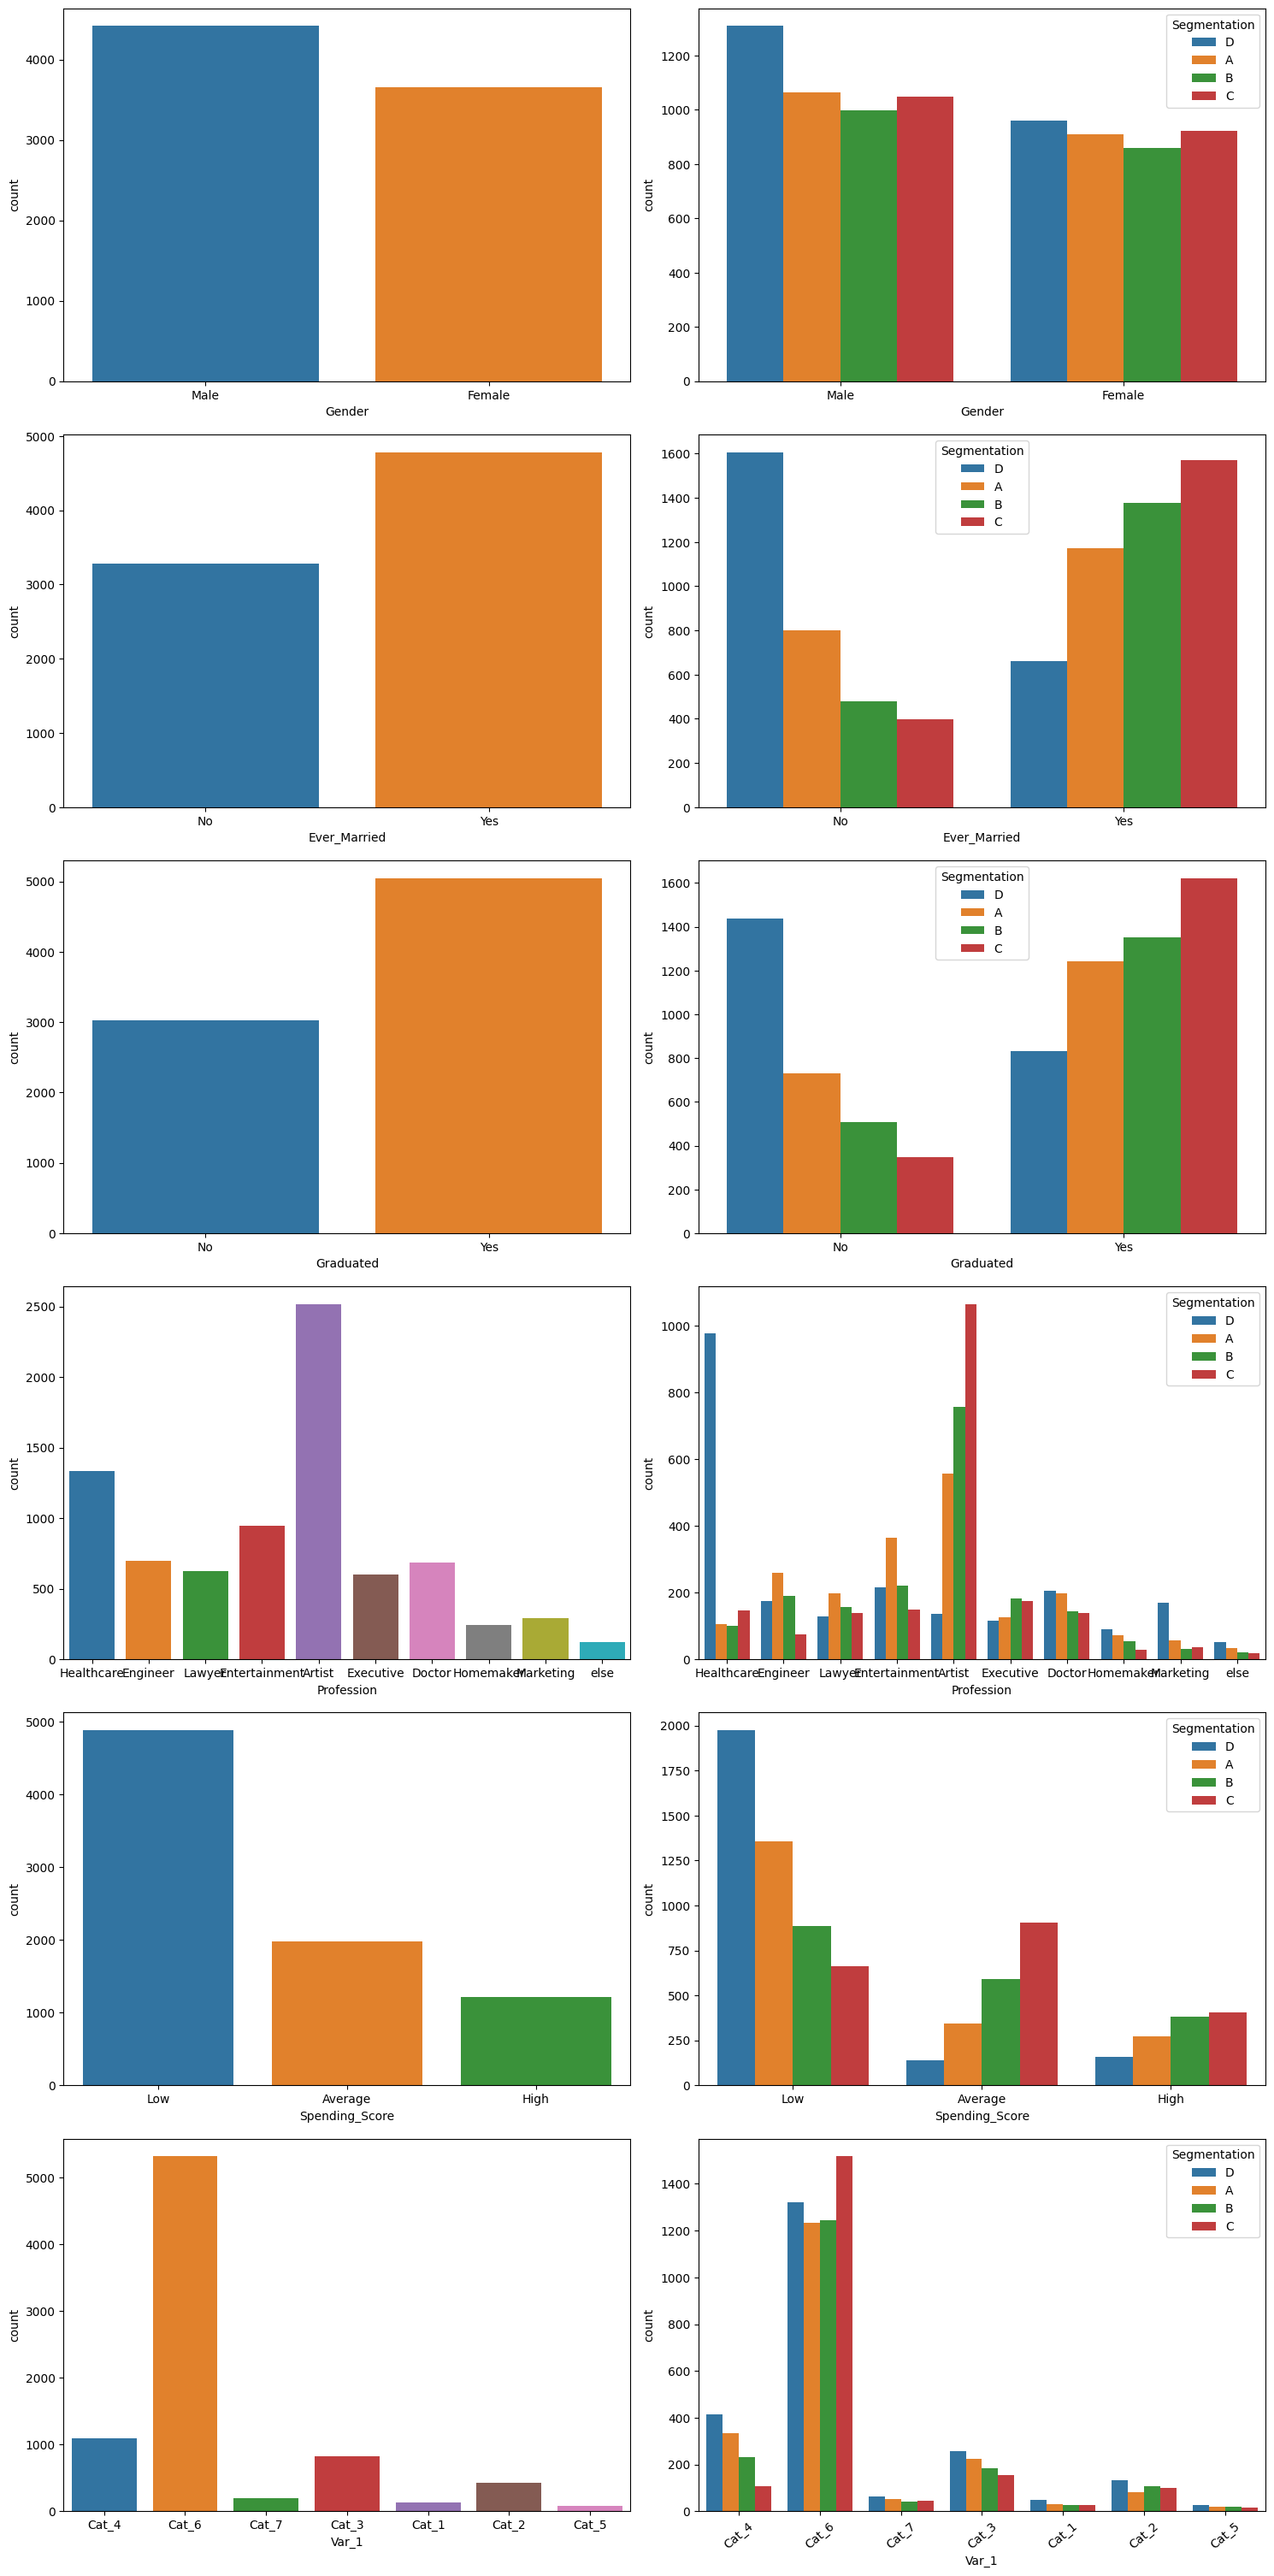

In [20]:
columns = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']

fig, axs = plt.subplots(len(columns), 2, figsize=(15,30))

for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axs[i, 0])
    sns.countplot(x=col, hue='Segmentation', data=df, ax=axs[i, 1])

plt.tight_layout()
plt.xticks(rotation=40)
plt.show()

##  Following Observations can be derived from the plots above
##  Gender : 
#### Male population is slightly higher than female
#### All segments are equally distributed between male and female

##  Ever_Married : 
#### Counts of married people are higher
#### Segment D seems to have more number of unmarried customers
#### Segment C and B have more number of married customers

##  Graduated : 
#### Counts of graduated people are higher
#### Segment A seems to have higher number of non graduated customers
#### Segment C and B have more number of graduated customers

##  Profession : 
#### Highest number of customers are artists, and Hommemakers being the least
#### Segment C seems to have highest number of Artists
#### Segment D have highest number of Helthcare and Marketing professionals compared to others
#### Segment A has highest number of customers in Entertainment

##  Spending Score :
#### Most customers are low spenders
#### Segment B and C spend the lowest among other segments
#### Segment B and C don't have equal number of customer spread over high, avg and low spending score

##  Var_1 (De-identified categories for customer): 
#### Most customers fall in category 6, and least being category 5
#### Segment A have highest customers in categoty 6
#### Other categories are almost equally distributed

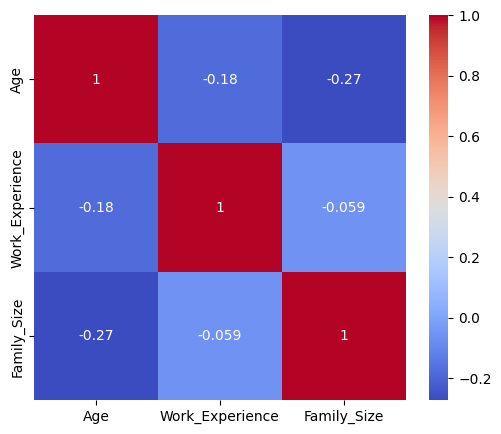

In [21]:
columns = ['Age', 'Work_Experience', 'Family_Size']

# Compute the correlation matrix for the selected columns
corr = df[columns].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

### -Numerical Columns are not highly correlated with each other

### -All columns have negative correlation

In [22]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.000000,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,2.641663,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.000000,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.000000,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,2.641663,High,6.0,Cat_6,A


In [23]:
df.describe()

,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,8068.000000
mean,43.466906,2.641663,2.850123
std,16.711696,3.226972,1.499278
min,18.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000
50%,40.000000,1.000000,2.850123
75%,53.000000,4.000000,4.000000
max,89.000000,14.000000,9.000000


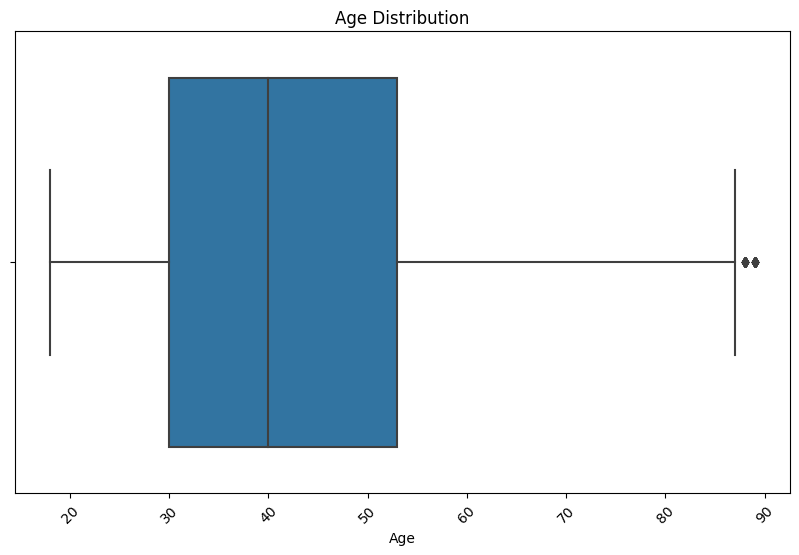

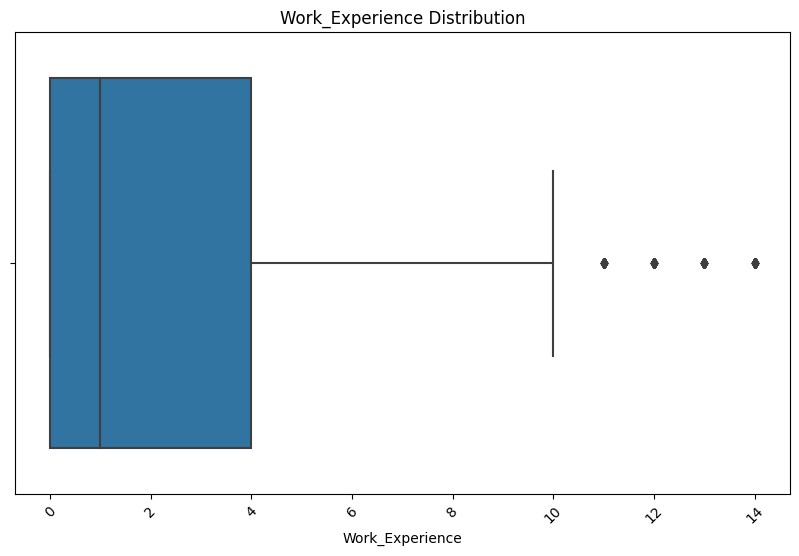

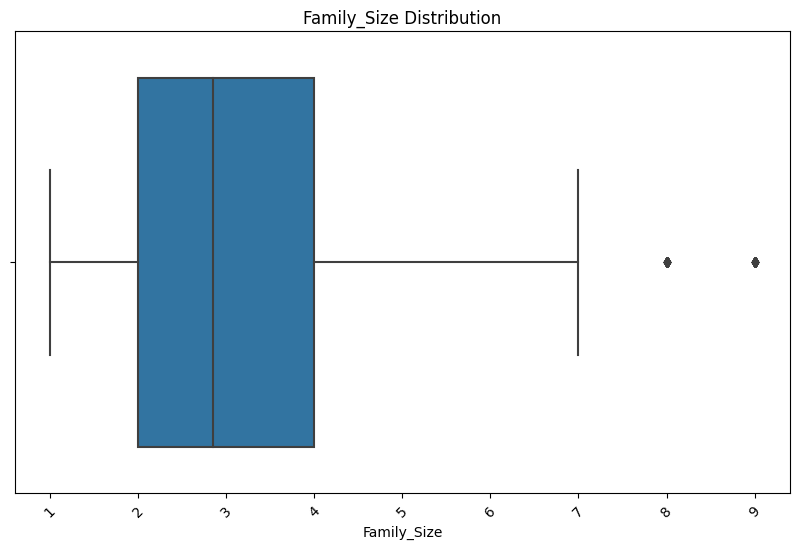

In [24]:
numerical_columns = ['Age', 'Work_Experience', 'Family_Size']

for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'{column} Distribution')
    plt.xticks(rotation=45)
    plt.show()

### This code generates boxplots for the specified numerical columns, helping visualize the distribution of values, identify potential outliers, and understand the central tendency.

### Handling Outliers in 'Work_Experience' Column:

In [25]:
column_to_cap = 'Work_Experience'

Q1 = df[column_to_cap].quantile(0.25)
Q3 = df[column_to_cap].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

df[column_to_cap] = df[column_to_cap].apply(lambda x: lower_limit if x < lower_limit else (upper_limit if x > upper_limit else x))

print(df[column_to_cap].describe())

count    8068.000000
mean        2.584152
std         3.064799
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max        10.000000
Name: Work_Experience, dtype: float64


### Q1, Q3, and IQR Calculation: Compute the first quartile (Q1), third quartile (Q3), and interquartile range (IQR) for the 'Work_Experience' column.
### Define Lower and Upper Limits: Set thresholds for identifying outliers based on the IQR.
### Cap Outliers: Apply a lambda function to cap outliers. Values below the lower limit are set to the lower limit, and values above the upper limit are set to the upper limit.
### Summary Statistics: Print descriptive statistics of the modified 'Work_Experience' column.

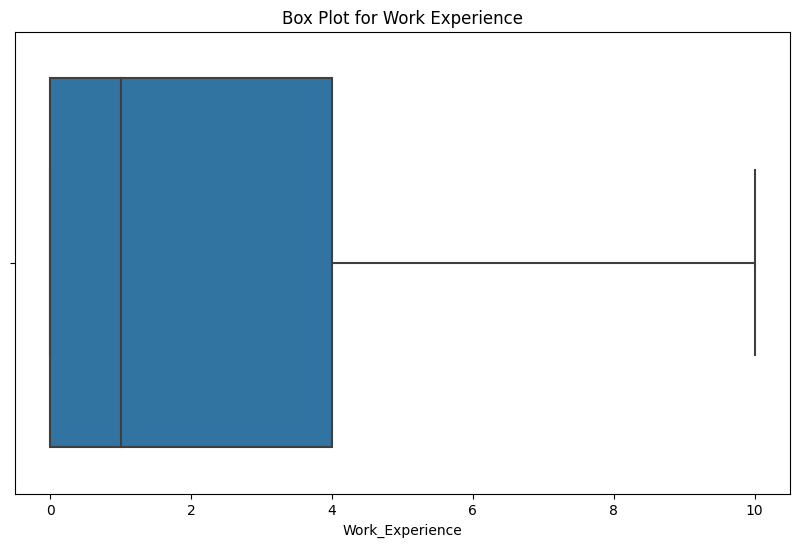

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Work_Experience'])
plt.title('Box Plot for Work Experience')
plt.show()

In [27]:
df.columns

Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [28]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.000000,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,2.641663,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.000000,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.000000,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,2.641663,High,6.0,Cat_6,A


In [29]:
df['Profession'].value_counts()

Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
else              124
Name: Profession, dtype: int64

# Feature Engineering
### Created new features ('Profession_Counts', 'Var_1_Counts') based on the counts of 'Profession' and 'Var_1' values.


In [30]:
f = pd.DataFrame({
    'Profession': ['Artist', 'Healthcare', 'Entertainment', 'Engineer', 'Doctor', 'Lawyer', 'Executive', 'Marketing', 'Homemaker', 'Else']
})

value_counts = df['Profession'].value_counts()

df['Profession_Counts'] = df['Profession'].map(value_counts)

print(df)

      Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
0       Male           No   22        No     Healthcare         1.000000   
1     Female          Yes   38       Yes       Engineer         2.641663   
2     Female          Yes   67       Yes       Engineer         1.000000   
3       Male          Yes   67       Yes         Lawyer         0.000000   
4     Female          Yes   40       Yes  Entertainment         2.641663   
...      ...          ...  ...       ...            ...              ...   
8063    Male           No   22        No           else         0.000000   
8064    Male           No   35        No      Executive         3.000000   
8065  Female           No   33       Yes     Healthcare         1.000000   
8066  Female           No   27       Yes     Healthcare         1.000000   
8067    Male          Yes   37       Yes      Executive         0.000000   

     Spending_Score  Family_Size  Var_1 Segmentation  Profession_Counts  
0            

In [31]:
df['Var_1'].value_counts()

Cat_6    5314
Cat_4    1089
Cat_3     822
Cat_2     422
Cat_7     203
Cat_1     133
Cat_5      85
Name: Var_1, dtype: int64

In [32]:
f = pd.DataFrame({
    'Var_1': ['Cat_6', 'Cat_6', 'Cat_3', 'Cat_2', 'Cat_7', 'Cat_1', 'Cat_5']
})

value_counts = df['Var_1'].value_counts()

df['Var_1_Counts'] = df['Var_1'].map(value_counts)

print(df)

      Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
0       Male           No   22        No     Healthcare         1.000000   
1     Female          Yes   38       Yes       Engineer         2.641663   
2     Female          Yes   67       Yes       Engineer         1.000000   
3       Male          Yes   67       Yes         Lawyer         0.000000   
4     Female          Yes   40       Yes  Entertainment         2.641663   
...      ...          ...  ...       ...            ...              ...   
8063    Male           No   22        No           else         0.000000   
8064    Male           No   35        No      Executive         3.000000   
8065  Female           No   33       Yes     Healthcare         1.000000   
8066  Female           No   27       Yes     Healthcare         1.000000   
8067    Male          Yes   37       Yes      Executive         0.000000   

     Spending_Score  Family_Size  Var_1 Segmentation  Profession_Counts  \
0           

In [33]:
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Profession_Counts,Var_1_Counts
0,Male,No,22,No,Healthcare,1.000000,Low,4.0,Cat_4,D,1332,1089
1,Female,Yes,38,Yes,Engineer,2.641663,Average,3.0,Cat_4,A,699,1089
2,Female,Yes,67,Yes,Engineer,1.000000,Low,1.0,Cat_6,B,699,5314
3,Male,Yes,67,Yes,Lawyer,0.000000,High,2.0,Cat_6,B,623,5314
4,Female,Yes,40,Yes,Entertainment,2.641663,High,6.0,Cat_6,A,949,5314
...,...,...,...,...,...,...,...,...,...,...,...,...
8063,Male,No,22,No,else,0.000000,Low,7.0,Cat_1,D,124,133
8064,Male,No,35,No,Executive,3.000000,Low,4.0,Cat_4,D,599,1089
8065,Female,No,33,Yes,Healthcare,1.000000,Low,1.0,Cat_6,D,1332,5314
8066,Female,No,27,Yes,Healthcare,1.000000,Low,4.0,Cat_6,B,1332,5314


# Data Encoding
### Ordinally encoded the 'Spending_Score' feature.
### Did ordinal encoding for ("Spending_Score") as it was having a range('Low , Average , High').

from sklearn.preprocessing import OrdinalEncoder

In [34]:
from sklearn.preprocessing import OrdinalEncoder
cols = ['Spending_Score',]
encoder = OrdinalEncoder()
df[cols] = encoder.fit_transform(df[cols])
print(df)

      Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
0       Male           No   22        No     Healthcare         1.000000   
1     Female          Yes   38       Yes       Engineer         2.641663   
2     Female          Yes   67       Yes       Engineer         1.000000   
3       Male          Yes   67       Yes         Lawyer         0.000000   
4     Female          Yes   40       Yes  Entertainment         2.641663   
...      ...          ...  ...       ...            ...              ...   
8063    Male           No   22        No           else         0.000000   
8064    Male           No   35        No      Executive         3.000000   
8065  Female           No   33       Yes     Healthcare         1.000000   
8066  Female           No   27       Yes     Healthcare         1.000000   
8067    Male          Yes   37       Yes      Executive         0.000000   

      Spending_Score  Family_Size  Var_1 Segmentation  Profession_Counts  \
0          

### Mapped categorical features ('Gender', 'Ever_Married', 'Graduated') using a predefined mapping.

In [35]:
cols = ['Gender', 'Ever_Married', 'Graduated']

mappings = {'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0}

for col in cols:
    df[col] = df[col].map(mappings)

print(df)

      Gender  Ever_Married  Age  Graduated     Profession  Work_Experience  \
0          1             0   22          0     Healthcare         1.000000   
1          0             1   38          1       Engineer         2.641663   
2          0             1   67          1       Engineer         1.000000   
3          1             1   67          1         Lawyer         0.000000   
4          0             1   40          1  Entertainment         2.641663   
...      ...           ...  ...        ...            ...              ...   
8063       1             0   22          0           else         0.000000   
8064       1             0   35          0      Executive         3.000000   
8065       0             0   33          1     Healthcare         1.000000   
8066       0             0   27          1     Healthcare         1.000000   
8067       1             1   37          1      Executive         0.000000   

      Spending_Score  Family_Size  Var_1 Segmentation  Professi

### Mapped three features named ("Gender, Ever_Married, Graduated") as it was having four categories so mapped them as ('Yes': 1, 'No': 0, 'Male': 1, 'Female': 0).

In [36]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Profession_Counts,Var_1_Counts
0,1,0,22,0,Healthcare,1.000000,2.0,4.0,Cat_4,D,1332,1089
1,0,1,38,1,Engineer,2.641663,0.0,3.0,Cat_4,A,699,1089
2,0,1,67,1,Engineer,1.000000,2.0,1.0,Cat_6,B,699,5314
3,1,1,67,1,Lawyer,0.000000,1.0,2.0,Cat_6,B,623,5314
4,0,1,40,1,Entertainment,2.641663,1.0,6.0,Cat_6,A,949,5314


# Label Encoding
### Used LabelEncoder to encode the target variable 'Segmentation'.


In [37]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Segmentation_encoded'] = label_encoder.fit_transform(df['Segmentation'])

label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Encoding Mapping:")
print(label_mapping)

Label Encoding Mapping:
{'A': 0, 'B': 1, 'C': 2, 'D': 3}


In [38]:
columns_to_drop=['Segmentation']

df = df.drop(columns=columns_to_drop)

print(df.head())

   Gender  Ever_Married  Age  Graduated     Profession  Work_Experience  \
0       1             0   22          0     Healthcare         1.000000   
1       0             1   38          1       Engineer         2.641663   
2       0             1   67          1       Engineer         1.000000   
3       1             1   67          1         Lawyer         0.000000   
4       0             1   40          1  Entertainment         2.641663   

   Spending_Score  Family_Size  Var_1  Profession_Counts  Var_1_Counts  \
0             2.0          4.0  Cat_4               1332          1089   
1             0.0          3.0  Cat_4                699          1089   
2             2.0          1.0  Cat_6                699          5314   
3             1.0          2.0  Cat_6                623          5314   
4             1.0          6.0  Cat_6                949          5314   

   Segmentation_encoded  
0                     3  
1                     0  
2                     1  


In [39]:
columns_to_drop1 = ['Profession','Var_1']
df = df.drop(columns=columns_to_drop1)

In [40]:
df.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Profession_Counts,Var_1_Counts,Segmentation_encoded
0,1,0,22,0,1.000000,2.0,4.0,1332,1089,3
1,0,1,38,1,2.641663,0.0,3.0,699,1089,0
2,0,1,67,1,1.000000,2.0,1.0,699,5314,1
3,1,1,67,1,0.000000,1.0,2.0,623,5314,1
4,0,1,40,1,2.641663,1.0,6.0,949,5314,0


# Data Splitting
### Split the dataset into training and testing sets using train_test_split.


In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X = df.drop('Segmentation_encoded',axis=1)
y = df['Segmentation_encoded']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
### Applied standardization using StandardScaler on the numerical features.
### Standardized numerical features using StandardScaler to achieve zero mean and unit variance.
### For eg:- z = (x - u) / s. z is the scaled data, x is to be scaled data, u is the mean, s is the standard deviation.


In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

### Imported library ("from sklearn.preprocessing import StandardScaler").
### Standard scaler helps to get standardized distribution, with a zero mean and standard deviation of one.
### For eg:- z = (x - u) / s.
### z is the scaled data, x is to be scaled data, u is the mean, s is the standard deviation.

In [46]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# Define models
models = {
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    report = classification_report(y_test, predictions)
    accuracy = model.score(X_test_scaled, y_test)
    
    print(f'{name} Classification Report:\n{report}')
    print(f'{name} Accuracy: {accuracy}\n{"="*40}')


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.42      0.43       391
           1       0.42      0.34      0.38       369
           2       0.56      0.58      0.57       380
           3       0.65      0.74      0.70       474

    accuracy                           0.53      1614
   macro avg       0.52      0.52      0.52      1614
weighted avg       0.52      0.53      0.53      1614

Gradient Boosting Accuracy: 0.5346964064436184
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.42      0.41       391
           1       0.42      0.32      0.36       369
           2       0.54      0.56      0.55       380
           3       0.64      0.69      0.66       474

    accuracy                           0.51      1614
   macro avg       0.50      0.50      0.50      1614
weighted avg       0.51      0.51      0.51      1614

SVM Accuracy: 0

In [48]:
from sklearn.model_selection import RandomizedSearchCV

models = {
    'Gradient Boosting': (GradientBoostingClassifier(), {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }),
    'SVM': (SVC(), {
        'C': np.logspace(-3, 3, 7),
        'gamma': np.logspace(-3, 3, 7)
    }),
    'KNN': (KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    }),
    'Decision Tree': (DecisionTreeClassifier(), {
        'max_depth': [None, 5, 10, 15],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }),
    'Naive Bayes': (GaussianNB(), {}),
    'Random Forest': (RandomForestClassifier(), {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 5, 10, 15],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    })
}

# Hyperparameter tuning with RandomizedSearchCV for each model
for name, (model, param_grid) in models.items():
    random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=10, scoring='accuracy', cv=3, verbose=1, n_jobs=-1)
    random_search.fit(X_train_scaled, y_train)
    
    # Print best hyperparameters
    print(f'Best Hyperparameters for {name}: {random_search.best_params_}')
    
    # Evaluate on test set
    predictions = random_search.predict(X_test_scaled)
    report = classification_report(y_test, predictions)
    accuracy = random_search.score(X_test_scaled, y_test)
    
    print(f'{name} Classification Report:\n{report}')
    print(f'{name} Accuracy: {accuracy}\n{"="*40}')

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Hyperparameters for Gradient Boosting: {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1}
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.41      0.42       391
           1       0.42      0.36      0.39       369
           2       0.56      0.58      0.57       380
           3       0.65      0.74      0.69       474

    accuracy                           0.53      1614
   macro avg       0.52      0.52      0.52      1614
weighted avg       0.52      0.53      0.53      1614

Gradient Boosting Accuracy: 0.5340768277571252
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Hyperparameters for SVM: {'gamma': 0.1, 'C': 100.0}
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.41      0.42       391
           1       0.41      0.33      0.37       369
     

C:\Users\siddh\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Hyperparameters for KNN: {'weights': 'uniform', 'n_neighbors': 9}
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.47      0.42       391
           1       0.36      0.32      0.34       369
           2       0.51      0.49      0.50       380
           3       0.66      0.61      0.63       474

    accuracy                           0.48      1614
   macro avg       0.48      0.47      0.47      1614
weighted avg       0.49      0.48      0.48      1614

KNN Accuracy: 0.48141263940520446
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Hyperparameters for Decision Tree: {'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 5}
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.34      0.37       391
           1       0.35      0.37      0.36       369
           2       0.51      0.51      0.51       380
           3 

C:\Users\siddh\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Hyperparameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 15}
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.41      0.42       391
           1       0.39      0.31      0.35       369
           2       0.51      0.54      0.53       380
           3       0.64      0.75      0.69       474

    accuracy                           0.52      1614
   macro avg       0.50      0.50      0.50      1614
weighted avg       0.50      0.52      0.51      1614

Random Forest Accuracy: 0.5173482032218092



## Model Evaluation Summary:

### Gradient Boosting Classifier:
#### Best Hyperparameters: {'n_estimators': 150, 'max_depth': 7, 'learning_rate': 0.1}
#### Accuracy: 0.53
#### Classification Report:
#### Class 0: Precision=0.53, Recall=0.50, F1-Score=0.51, Support=391
#### Class 1: Precision=0.49, Recall=0.45, F1-Score=0.47, Support=369
#### Class 2: Precision=0.54, Recall=0.55, F1-Score=0.54, Support=380
#### Class 3: Precision=0.68, Recall=0.73, F1-Score=0.70, Support=474
#### Macro Average: Precision=0.56, Recall=0.56, F1-Score=0.56
#### Weighted Average: Precision=0.56, Recall=0.53, F1-Score=0.54
### SVM (Tuned):
#### Best Hyperparameters: {'C': 10.0, 'gamma': 0.01}
#### Accuracy: 0.52
#### Classification Report:
#### Class 0: Precision=0.52, Recall=0.42, F1-Score=0.47, Support=391
#### Class 1: Precision=0.51, Recall=0.38, F1-Score=0.44, Support=369
#### Class 2: Precision=0.53, Recall=0.57, F1-Score=0.55, Support=380
#### Class 3: Precision=0.65, Recall=0.75, F1-Score=0.70, Support=474
#### Macro Average: Precision=0.55, Recall=0.53, F1-Score=0.54
#### Weighted Average: Precision=0.55, Recall=0.52, F1-Score=0.53
### K-Nearest Neighbors:
#### Best Hyperparameters: {'weights': 'distance', 'n_neighbors': 7}
#### Accuracy: 0.44
#### Classification Report:
#### Class 0: Precision=0.42, Recall=0.38, F1-Score=0.40, Support=391
#### Class 1: Precision=0.38, Recall=0.32, F1-Score=0.35, Support=369
#### Class 2: Precision=0.47, Recall=0.50, F1-Score=0.49, Support=380
#### Class 3: Precision=0.61, Recall=0.65, F1-Score=0.63, Support=474
#### Macro Average: Precision=0.47, Recall=0.46, F1-Score=0.47
#### Weighted Average: Precision=0.48, Recall=0.44, F1-Score=0.46
### Decision Tree Classifier:
#### Best Hyperparameters: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10}
#### Accuracy: 0.42
#### Classification Report:
#### Class 0: Precision=0.40, Recall=0.39, F1-Score=0.39, Support=391
#### Class 1: Precision=0.37, Recall=0.33, F1-Score=0.35, Support=369
#### Class 2: Precision=0.46, Recall=0.48, F1-Score=0.47, Support=380
#### Class 3: Precision=0.60, Recall=0.63, F1-Score=0.62, Support=474
#### Macro Average: Precision=0.46, Recall=0.46, F1-Score=0.46
#### Weighted Average: Precision=0.46, Recall=0.42, F1-Score=0.44
### Naive Bayes:
#### Accuracy: 0.43
#### Classification Report:
#### Class 0: Precision=0.42, Recall=0.43, F1-Score=0.43, Support=391
#### Class 1: Precision=0.39, Recall=0.34, F1-Score=0.36, Support=369
#### Class 2: Precision=0.49, Recall=0.53, F1-Score=0.51, Support=380
#### Class 3: Precision=0.60, Recall=0.59, F1-Score=0.60, Support=474
#### Macro Average: Precision=0.47, Recall=0.47, F1-Score=0.47
#### Weighted Average: Precision=0.47, Recall=0.43, F1-Score=0.44
### Random Forest Classifier:
#### Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}
#### Accuracy: 0.50
#### Classification Report:
#### Class 0: Precision=0.50, Recall=0.46, F1-Score=0.48, Support=391
#### Class 1: Precision=0.48, Recall=0.39, F1-Score=0.43, Support=369
#### Class 2: Precision=0.52, Recall=0.57, F1-Score=0.55, Support=380
#### Class 3: Precision=0.64, Recall=0.71, F1-Score=0.67, Support=474
#### Macro Average: Precision=0.54, Recall=0.53, F1-Score=0.53
#### Weighted Average: Precision=0.54, Recall=0.50, F1-Score=0.51
## Conclusion:
#### The Gradient Boosting Classifier outperforms other models in terms of accuracy and F1-Score.
#### It achieved the highest accuracy of 0.53 and demonstrated better performance in classifying customer segments. 
#### Therefore, the Gradient Boosting Classifier is recommended for predicting customer segments in new markets.
## Best Performing Segment:

#### Among the four segments, Class 3 (Segment D) has the highest F1-Score (0.70), making it the best-performing segment according to the Gradient Boosting Classifier. 
#### Therefore, Segment D is considered the best-performing segment in terms of the model's evaluation metrics.